# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="C://Users/viren/Desktop/p1_navigation/Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### Report

So far, we have loaded our Unity environment and tested a random agent to ensure that everything works as expected. Now begins the code that will train and use a DQN agent to solve the problem.

Let us start by importing all the remaining files we need to make this happen. Please note that the line **from dqn_agent import Agent** uses an unmodified version of the DQN code used in the Lunar Landing project done earlier in the nanodegree. This file (and its dependency *QNetwork* from the *model.py* file) are also imported at this stage.

In [7]:
import torch

from collections import deque

from dqn_agent import Agent

import matplotlib.pyplot as plt
%matplotlib inline

Just as in the Lunar Lander program, we will instantiate an agent. The primary difference here is that while the *state_size* was 8 there, it is 37 here. This is an intrinsic quality of the environment itself.

In [8]:
agent = Agent(state_size=37, action_size=4, seed=0)

Now, we write the code that uses the DQN to train in the environment. The code you see below is nearly identical to the Lunar Lander project but adapted with the following changes:

1. Changes in the way a Unity environment returns the state.
2. Changes in the way a Unity environment performs an action.
3. Stop when the score reaches 13, not 200, as in the Lunar Lander project.

#### 1. Learning Algorithm

**Explanation of the Learning Algorithm**

Deep Reinforcement Learning uses Non-linear Function Approximators to calculate the action-values based directly on observations from the environment. We represent this as a Deep Neural Network and use Deep Learning to find the optimal parameters for these function approximators. The Deep Q-Learning algorithm represents the optimal action-value function q* ​as a neural network (instead of a table).

Unfortunately, Reinforcement Learning is notoriously unstable when neural networks are used to represent the action values. The Deep Q-Learning algorithm addresses these instabilities by using two key features:

- Experience Replay: A Replay Pool keeps track of a rolling history of past data. Here, the behavior distribution is averaged over many of its previous states, smoothing out learning and avoiding oscillations. The advantage is that each step of the experience is potentially used in many weight updates.
- Fixed Q-Targets: A Target Network is used to represent the old Q-Function, which computes every action's loss during training. The issue with using a single network is that at each step of training, the Q-Function values change, and the value estimates can quickly spiral out of control.

• Experience Replay: When the agent interacts with the environment, the sequence of experience tuples can be highly correlated (because at every step, the current action affects the next state). The naive Q-learning algorithm that learns from each of these experience tuples in sequential order runs the risk of getting swayed by the effects of this correlation. By instead keeping track of a replay buffer and using experience replay to sample from the buffer at random (as opposed to being sequential), we can prevent action values from oscillating or diverging catastrophically.

The replay buffer contains a collection of experience tuples (S, A, R, S'). The tuples are gradually added to the buffer as we are interacting with the environment.

The act of sampling a small batch of tuples from the replay buffer to learn is known as experience replay. In addition to breaking harmful correlations, experience replay allows us to learn more from individual tuples multiple times, recall rare occurrences, and in general, make better use of our experience.

In this way, Experience Replay reduces the Reinforcement Learning problem's value-learning portion to a Supervised Learning task. We can then use well established Supervised Learning algorithms to solve the problem. We can also improve upon this idea by prioritizing experience tuples that are rare or more important.

• Fixed Q-Targets: Apart from the correlation between consecutive experience tuples that Experience Replay addresses, Q-Learning is also susceptible to another kind of correlation, caused because we are trying to update a guess with a guess. To avoid this, we can update the parameters w in the network q̂ to better approximate the action value corresponding to state S and action A with the following update rule:

Δw = α . (R + γ max q̂ (S', a, w-) - q̂ (S, A, w)) ∇w q̂ (S, A, w)

Where w- are the weights of a separate target network that are not changed during the learning step, and (S, A, R, S') is an experience tuple.

R + γ max q̂ (S', a, w-) is the Temporal Difference target.

Thus, the Deep Q-Learning algorithm uses two separate networks with identical architectures. The Target Q-Network's weights are updated less often than the primary Q-Network. Without fixed Q-Targets, we would encounter a harmful form of correlation, whereby we shift the network's parameters based on a continually moving target.

**Explanation of Hyperparameters used**

`BUFFER_SIZE = int(1e5)`

The size of the Replay Buffer that holds tuples of experiences that can be selected multiple times.

`BATCH_SIZE = 64`

The number of entries from the Replay Buffer that are considered a part of each batch.

`GAMMA = 0.99`

The hyperparameter that prioritizes how much weightage is given to recently received rewards, as compared to previous rewards.

`TAU = 1e-3`

The architecture makes use of two networks- a fixed network and a target network. This hyperparameter is used for providing soft updates to the target network; i.e., instead of updating the values all at once, the process happens gradually, controlled with this hyperparameter.

`LR = 5e-4`

The learning rate with which the model learns.

`UPDATE_EVERY = 4`

How many steps to take before updating the network.

**Explanation of Model Architecture**

Both networks, the regular and the target, have the same architecture. They consist of an input layer with 37 nodes (for the 37 dimension vector provided as the state), followed by two layers of 64 neurons each. ReLu activations are used to maintain the non-linearity in the models. The output layer consists of four nodes, representing each of the possible actions.

**Explanation of Training Process**

The agent is trained for 2000 episodes, with 1000 timesteps per episode. Epsilon is used to balance the agent between exploration and exploitation. We start with a value of 1.0 and end with 0.01, decaying at a rate of 99.5% every time.

In [9]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        
        # Instead of saying: state = env.reset(), we must first create an env_info object as shown above
        
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            
            # Instead of saying: next_state, reward, done, _ = env.step(action), we must do this step as shown above
            # I had to add .astype(int) to the action variable to get the code to run on my PC
            
            env_info = env.step(action.astype(int))[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        # '200' from the Lunar Lander project was changed to '13' to match the requirements
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

Episode 100	Average Score: 0.74
Episode 200	Average Score: 3.38
Episode 300	Average Score: 6.42
Episode 400	Average Score: 10.37
Episode 500	Average Score: 12.73
Episode 508	Average Score: 13.01
Environment solved in 408 episodes!	Average Score: 13.01


#### 2. Plot of Rewards

This plot of rewards per episode has been included to illustrate that the agent is capable of receiving an average reward of +13 over the last 100 episodes. From the previous code cell, we see that we have solved the environment in **408** episodes.

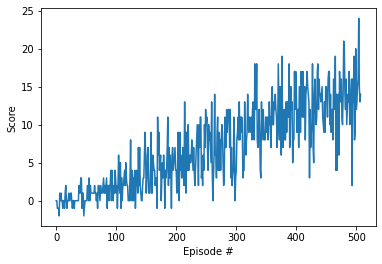

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

We can now go ahead and close the environment.

In [11]:
env.close()

#### 3. Ideas for Future Work

1. As mentioned in the optional section of this project, we can use raw pixel data from the environment instead of the state vector of 37 dimensions currently returned.

2. As mentioned in the suggestions section, we can implement a **Double DQN** or a **Dueling DQN**, with or without **Prioritized Experience Replay**, to get faster convergence.

The content in the following cells has been taken directly from the nanodegree lectures. I do not own this content but am noting it here to add to this submission's quality.

**Double DQN**

Q-Learning is prone to an overestimation of the Q-Values. The arg_max operation in the TD target is necessary to find the best possible value we can get from the next state; we want to obtain the Q-value for the state S' and the action that results in the maximum Q-value among all possible actions from that state. The arg_max operation can make a mistake, especially in the early stages, because the Q-values are still evolving, and we may not have gathered enough information to figure out the best action.

Double Q-Learning solves this problem, where we select the best action using one set of parameters w but evaluate it using a different set of parameters w'. It is like having two separate function approximators that must agree on the best action. If they do not, the Q-value returned will be lower. In the long run, this prevents the algorithm from propagating incidental high rewards that may have been obtained by chance and do not reflect long-term returns. When using DQNs with fixed targets, we already have an alternate set of parameters to use as w'.

**Duelling DQN**

In the typical DQN architecture, we have a couple of fully connected layers that produce Q-values. In Dueling Networks, we use two streams, one that estimates the state-value function and one that estimates the advantage for each action. These streams may share some layers initially, such as convolutional layers, then branch off with their own fully-connected layers. The desired Q-values are obtained by combining the state and the advantage values. This works because most states' value does not vary across actions, making sense to estimate them directly. The Advantage Function is used to capture the difference actions make in each state.

**Prioritized Experience Replay**

In the Experience Replay buffer, some experiences may be more critical than others; they may also occur infrequently. If we sample the batches uniformly, then these experiences have a minimal chance of getting selected. Since buffers are limited in capacity, older experiences may get lost. We can use the TD error to weight the tuples, such that experiences with a higher error are picked more often from the buffer.